In [1]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install sklearn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

sns.set()

In [3]:
#df = pd.read_csv(r"C:\Users\alexchen\ML\nzairfare\NZairfares.csv")

In [4]:
#Reduce data size
df = pd.read_csv(r"C:\Users\alexchen\ML\nzairfare\NZairfares.csv")
df = df.sample(frac=0.04) # Only Extract 4% of total data - for pickle file upload limitation 25mb
len(df)                  # check length

6513

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6513 entries, 140268 to 101569
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Travel Date   6513 non-null   object
 1   Dep. airport  6512 non-null   object
 2   Dep. time     6513 non-null   object
 3   Arr. airport  6512 non-null   object
 4   Arr. time     6513 non-null   object
 5   Duration      6513 non-null   object
 6   Direct        6513 non-null   object
 7   Transit       4907 non-null   object
 8   Baggage       97 non-null     object
 9   Airline       6513 non-null   object
 10  Airfare(NZ$)  6513 non-null   int64 
dtypes: int64(1), object(10)
memory usage: 610.6+ KB


In [6]:
df=df.rename(columns={'Travel Date':'Date_of_Journey','Dep. time':'Dep_Time','Arr. time':'Arrival_Time','Dep. airport':'Source','Arr. airport':'Destination','Direct':'Total_Stops','Airfare(NZ$)':'Price'})

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6513 entries, 140268 to 101569
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date_of_Journey  6513 non-null   object
 1   Source           6512 non-null   object
 2   Dep_Time         6513 non-null   object
 3   Destination      6512 non-null   object
 4   Arrival_Time     6513 non-null   object
 5   Duration         6513 non-null   object
 6   Total_Stops      6513 non-null   object
 7   Transit          4907 non-null   object
 8   Baggage          97 non-null     object
 9   Airline          6513 non-null   object
 10  Price            6513 non-null   int64 
dtypes: int64(1), object(10)
memory usage: 610.6+ KB


In [8]:
df.shape

(6513, 11)

In [9]:
##check missing values
df.isnull().sum()

Date_of_Journey       0
Source                1
Dep_Time              0
Destination           1
Arrival_Time          0
Duration              0
Total_Stops           0
Transit            1606
Baggage            6416
Airline               0
Price                 0
dtype: int64

In [10]:
df.head()

,Date_of_Journey,Source,Dep_Time,Destination,Arrival_Time,Duration,Total_Stops,Transit,Baggage,Airline,Price
140268,30/11/2019,ZQN,11:40 AM,DUD,9:55 AM,22h 15m,(2 stops),NaN,NaN,Air New Zealand,372
146752,5/12/2019,AKL,1:00 PM,DUD,5:00 PM,4h 0m,(1 stop),1h 30m in CHC,NaN,Air New Zealand,485
89641,3/11/2019,CHC,9:00 AM,WLG,2:10 PM,5h 10m,(1 stop),2h 35m in AKL,NaN,Air New Zealand,432
49542,13/10/2019,WLG,6:45 PM,NPE,9:30 AM,14h 45m,(1 stop),12h 35m in AKL,NaN,Air New Zealand,487
64613,22/10/2019,AKL,1:00 PM,NPL,8:10 PM,7h 10m,(1 stop),5h 10m in WLG,NaN,Air New Zealand,382


In [11]:
df.describe()

,Price
count,6513.000000
mean,414.495931
std,171.100427
min,36.000000
25%,293.000000
50%,401.000000
75%,515.000000
max,1343.000000


In [12]:
df.columns

Index(['Date_of_Journey', 'Source', 'Dep_Time', 'Destination', 'Arrival_Time',
       'Duration', 'Total_Stops', 'Transit', 'Baggage', 'Airline', 'Price'],
      dtype='object')

In [13]:
#Check category var value distinct count
#print(df['Date_of_Journey'].unique())
#print(df['Source'].unique())
#print(df['Destination'].unique())
#print(df['Arrival_Time'].unique())
#print(df['Dep_Time'].unique())
#print(df['Duration'].unique())
print(df['Total_Stops'].unique())
#print(df['Transit'].unique())
#print(df['Baggage'].unique())
#print(df['Airline'].unique())


['(2 stops)' '(1 stop)' '(Direct)']


In [14]:
#Check category var value count
#print(df['Travel Date'].value_counts())
#print(df['Dep. airport'].value_counts())
#print(df['Arr. airport'].value_counts())
#print(df['Arr. time'].value_counts())
#print(df['Duration'].value_counts())
#print(df['Direct'].value_counts())
#print(df['Transit'].value_counts())
#print(df['Baggage'].value_counts())
#print(df['Airline'].value_counts())


In [15]:
# Remove column Baggage
df=df.drop(columns=['Baggage'])
# Drop missing value

df = df[df['Source'].notna()]
df = df[df['Arrival_Time'].notna()]
# Drop transit missing value when Direct not equal to "direct" 
# If Direct equal to "direct" then nah in transit will be count as 0
df_1 = df[df['Total_Stops'].isin(["(1 stop)","(2 stops)","(3 stops)"])&(df['Transit'].notnull())]
df_2 = df[df['Total_Stops']=="(Direct)"].fillna(0)
df_3 = pd.concat([df_1,df_2])

In [16]:
##check missing values
df_3.isnull().sum()

#df.head()

Date_of_Journey    0
Source             0
Dep_Time           0
Destination        0
Arrival_Time       0
Duration           0
Total_Stops        0
Transit            0
Airline            0
Price              0
dtype: int64

In [17]:
df_3.shape

(5667, 10)

### Split Data

In [18]:
################### split to train_data and test_data ##############################
train_data, test_data = train_test_split(df_3, test_size=0.2, random_state=25)

### Train Data

In [19]:
train_data["Journey_day"] = pd.to_datetime(train_data.Date_of_Journey, format="%d/%m/%Y").dt.day
train_data["Journey_month"] = pd.to_datetime(train_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month

<ipython-input-19-512f6a4de31c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data["Journey_day"] = pd.to_datetime(train_data.Date_of_Journey, format="%d/%m/%Y").dt.day
<ipython-input-19-512f6a4de31c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data["Journey_month"] = pd.to_datetime(train_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month


In [20]:
train_data=train_data.drop(columns=['Transit'])


In [21]:
# Departure time is when a plane leaves the gate. 
# Similar to Date_of_Journey we can extract values from Dep_Time

# Extracting Hours
train_data["Dep_hour"] = pd.to_datetime(train_data["Dep_Time"]).dt.hour

# Extracting Minutes
train_data["Dep_min"] = pd.to_datetime(train_data["Dep_Time"]).dt.minute

# Now we can drop Dep_Time as it is of no use
#train_data.drop(["Dep_time"], axis = 1, inplace = True)

In [22]:
# Arrival time is when the plane pulls up to the gate.
# Similar to Date_of_Journey we can extract values from Arrival_Time

# Extracting Hours
train_data["Arrival_hour"] = pd.to_datetime(train_data["Arrival_Time"]).dt.hour

# Extracting Minutes
train_data["Arrival_min"] = pd.to_datetime(train_data["Arrival_Time"]).dt.minute

# Now we can drop Arrival_Time as it is of no use
#train_data.drop(["Arr. time"], axis = 1, inplace = True)

In [23]:
# Time taken by plane to reach destination is called Duration
# It is the differnce betwwen Departure Time and Arrival time


# Assigning and converting Duration column into list
duration = list(train_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [24]:
# Adding duration_hours and duration_mins list to train_data dataframe

train_data["Duration_hours"] = duration_hours
train_data["Duration_mins"] = duration_mins

In [25]:
#train_data.drop(["Duration"], axis = 1, inplace = True)

In [26]:
train_data["Total_Stops"].value_counts()

(1 stop)    3923
(Direct)     610
Name: Total_Stops, dtype: int64

In [27]:
# As this is case of Ordinal Categorical type we perform LabelEncoder
# Here Values are assigned with corresponding keys

train_data.replace({"(Direct)": 0, "(1 stop)": 1, "(2 stops)": 2, "(3 stops)": 3}, inplace = True)

In [28]:
train_data.head()

,Date_of_Journey,Source,Dep_Time,Destination,Arrival_Time,Duration,Total_Stops,Airline,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
115553,17/11/2019,AKL,10:00 AM,NSN,7:20 PM,9h 20m,1,Air New Zealand,263,17,11,10,0,19,20,9,20
8953,23/09/2019,WLG,2:45 PM,CHC,6:25 PM,3h 40m,1,Air New Zealand,272,23,9,14,45,18,25,3,40
144252,3/12/2019,WLG,12:35 PM,NSN,5:10 PM,4h 35m,1,Air New Zealand,412,3,12,12,35,17,10,4,35
70032,25/10/2019,AKL,1:20 PM,CHC,9:15 PM,7h 55m,1,Air New Zealand,472,25,10,13,20,21,15,7,55
78753,29/10/2019,AKL,8:30 PM,ZQN,11:10 AM,14h 40m,1,Air New Zealand,302,29,10,20,30,11,10,14,40


In [29]:
train_data['Source'].value_counts()

WLG    1295
CHC    1263
AKL    1235
ZQN     740
Name: Source, dtype: int64

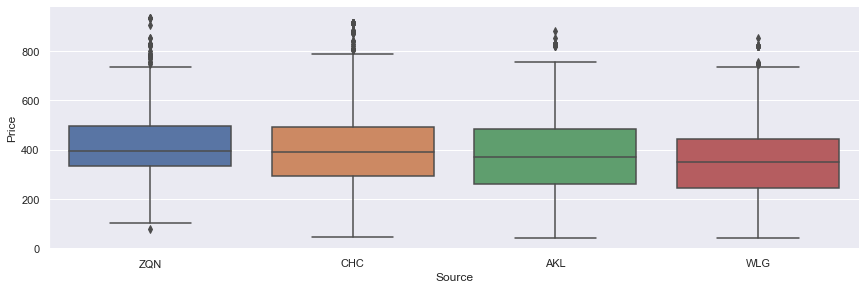

In [30]:
# Departure vs Price

sns.catplot(y = "Price", x = "Source", data = train_data.sort_values("Price", ascending = False), kind="box", height = 4, aspect = 3)
plt.show()

In [31]:
# As Departure is Nominal Categorical data we will perform OneHotEncoding

Departure = train_data["Source"].str.get_dummies().drop('ZQN',axis=1).add_prefix('Source_')

#Departure = pd.get_dummies(Departure)

Departure.head()

,Source_AKL,Source_CHC,Source_WLG
115553,1,0,0
8953,0,0,1
144252,0,0,1
70032,1,0,0
78753,1,0,0


In [32]:
train_data['Destination'].value_counts()

NSN    677
NPE    578
DUD    538
CHC    516
AKL    502
PMR    496
NPL    463
ZQN    404
WLG    359
Name: Destination, dtype: int64

In [33]:
# As Destination is Nominal Categorical data we will perform OneHotEncoding - drop WLG

Destination = train_data["Destination"].str.get_dummies().drop('WLG',axis=1).add_prefix('Destination_')

#Destination = pd.get_dummies(Destination)

Destination.head()

,Destination_AKL,Destination_CHC,Destination_DUD,Destination_NPE,Destination_NPL,Destination_NSN,Destination_PMR,Destination_ZQN
115553,0,0,0,0,0,1,0,0
8953,0,1,0,0,0,0,0,0
144252,0,0,0,0,0,1,0,0
70032,0,1,0,0,0,0,0,0
78753,0,0,0,0,0,0,0,1


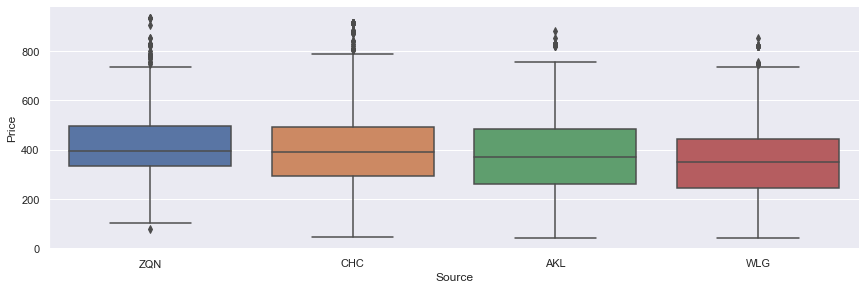

In [34]:
# Departure vs Price

sns.catplot(y = "Price", x = "Source", data = train_data.sort_values("Price", ascending = False), kind="box", height = 4, aspect = 3)
plt.show()

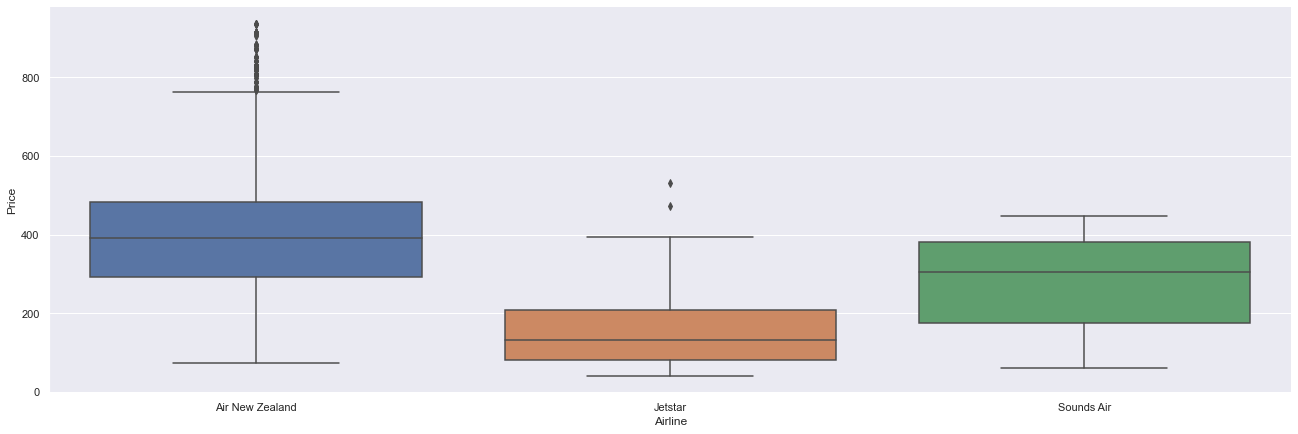

In [35]:
# From graph we can see that Jet Airways Business have the highest Price.
# Apart from the first Airline almost all are having similar median

# Airline vs Price
sns.catplot(y = "Price", x = "Airline", data = train_data.sort_values("Price", ascending = False), kind="box", height = 6, aspect = 3)
plt.show()

In [36]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding - avoid Multicollinearity

Airline=train_data["Airline"].str.get_dummies().drop('Sounds Air',axis=1)
Airline = pd.get_dummies(Airline)

Airline.head()

,Air New Zealand,Jetstar
115553,1,0
8953,1,0
144252,1,0
70032,1,0
78753,1,0


In [37]:
#train_data["Transit"].value_counts()

In [38]:
train_data.head()

,Date_of_Journey,Source,Dep_Time,Destination,Arrival_Time,Duration,Total_Stops,Airline,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
115553,17/11/2019,AKL,10:00 AM,NSN,7:20 PM,9h 20m,1,Air New Zealand,263,17,11,10,0,19,20,9,20
8953,23/09/2019,WLG,2:45 PM,CHC,6:25 PM,3h 40m,1,Air New Zealand,272,23,9,14,45,18,25,3,40
144252,3/12/2019,WLG,12:35 PM,NSN,5:10 PM,4h 35m,1,Air New Zealand,412,3,12,12,35,17,10,4,35
70032,25/10/2019,AKL,1:20 PM,CHC,9:15 PM,7h 55m,1,Air New Zealand,472,25,10,13,20,21,15,7,55
78753,29/10/2019,AKL,8:30 PM,ZQN,11:10 AM,14h 40m,1,Air New Zealand,302,29,10,20,30,11,10,14,40


In [39]:
train_data.columns

Index(['Date_of_Journey', 'Source', 'Dep_Time', 'Destination', 'Arrival_Time',
       'Duration', 'Total_Stops', 'Airline', 'Price', 'Journey_day',
       'Journey_month', 'Dep_hour', 'Dep_min', 'Arrival_hour', 'Arrival_min',
       'Duration_hours', 'Duration_mins'],
      dtype='object')

In [40]:
data_train = pd.concat([train_data, Airline, Departure, Destination], axis = 1)

In [41]:
data_train.shape

(4533, 30)

In [42]:
data_train.columns

Index(['Date_of_Journey', 'Source', 'Dep_Time', 'Destination', 'Arrival_Time',
       'Duration', 'Total_Stops', 'Airline', 'Price', 'Journey_day',
       'Journey_month', 'Dep_hour', 'Dep_min', 'Arrival_hour', 'Arrival_min',
       'Duration_hours', 'Duration_mins', 'Air New Zealand', 'Jetstar',
       'Source_AKL', 'Source_CHC', 'Source_WLG', 'Destination_AKL',
       'Destination_CHC', 'Destination_DUD', 'Destination_NPE',
       'Destination_NPL', 'Destination_NSN', 'Destination_PMR',
       'Destination_ZQN'],
      dtype='object')

In [43]:
#data_train.drop(["Airline", "Departure", "Destination"], axis = 1, inplace = True)

In [44]:
data_train.head()

,Date_of_Journey,Source,Dep_Time,Destination,Arrival_Time,Duration,Total_Stops,Airline,Price,Journey_day,...,Source_CHC,Source_WLG,Destination_AKL,Destination_CHC,Destination_DUD,Destination_NPE,Destination_NPL,Destination_NSN,Destination_PMR,Destination_ZQN
115553,17/11/2019,AKL,10:00 AM,NSN,7:20 PM,9h 20m,1,Air New Zealand,263,17,...,0,0,0,0,0,0,0,1,0,0
8953,23/09/2019,WLG,2:45 PM,CHC,6:25 PM,3h 40m,1,Air New Zealand,272,23,...,0,1,0,1,0,0,0,0,0,0
144252,3/12/2019,WLG,12:35 PM,NSN,5:10 PM,4h 35m,1,Air New Zealand,412,3,...,0,1,0,0,0,0,0,1,0,0
70032,25/10/2019,AKL,1:20 PM,CHC,9:15 PM,7h 55m,1,Air New Zealand,472,25,...,0,0,0,1,0,0,0,0,0,0
78753,29/10/2019,AKL,8:30 PM,ZQN,11:10 AM,14h 40m,1,Air New Zealand,302,29,...,0,0,0,0,0,0,0,0,0,1


### Test Set

In [45]:
test_data.head()

,Date_of_Journey,Source,Dep_Time,Destination,Arrival_Time,Duration,Total_Stops,Transit,Airline,Price
11110,24/09/2019,ZQN,11:40 AM,NPE,7:50 PM,8h 10m,(1 stop),5h 35m in CHC,Air New Zealand,283
152933,10/12/2019,WLG,11:30 AM,NSN,12:10 PM,40m,(Direct),0,Air New Zealand,183
43738,10/10/2019,WLG,2:00 PM,AKL,5:35 PM,3h 35m,(1 stop),1h 30m in NSN,Air New Zealand,536
137761,29/11/2019,AKL,8:00 PM,NPL,9:25 AM,13h 25m,(1 stop),11h 15m in WLG,Air New Zealand,402
47810,12/10/2019,WLG,1:35 PM,DUD,5:05 PM,3h 30m,(1 stop),1h 25m in CHC,Air New Zealand,433


Test data Info
---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1134 entries, 11110 to 22166
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date_of_Journey  1134 non-null   object
 1   Source           1134 non-null   object
 2   Dep_Time         1134 non-null   object
 3   Destination      1134 non-null   object
 4   Arrival_Time     1134 non-null   object
 5   Duration         1134 non-null   object
 6   Total_Stops      1134 non-null   object
 7   Transit          1134 non-null   object
 8   Airline          1134 non-null   object
 9   Price            1134 non-null   int64 
dtypes: int64(1), object(9)
memory usage: 97.5+ KB
None


Null values :
---------------------------------------------------------------------------
Date_of_Journey    0
Source             0
Dep_Time           0
Destination        0
Arrival_Time       0
Dura

<ipython-input-46-8165862ef515>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data.dropna(inplace = True)
<ipython-input-46-8165862ef515>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data["Journey_day"] = pd.to_datetime(test_data.Date_of_Journey, format="%d/%m/%Y").dt.day
<ipython-input-46-8165862ef515>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guid

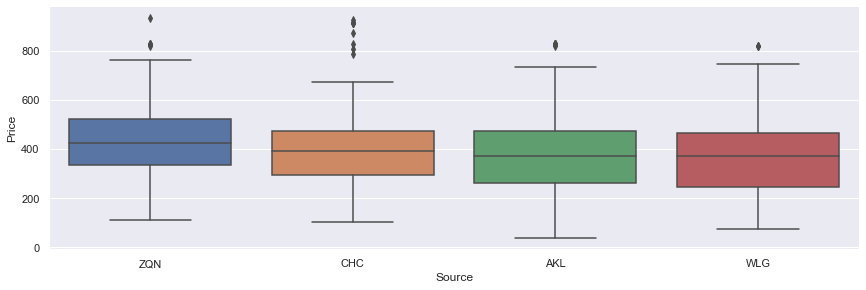

Destination


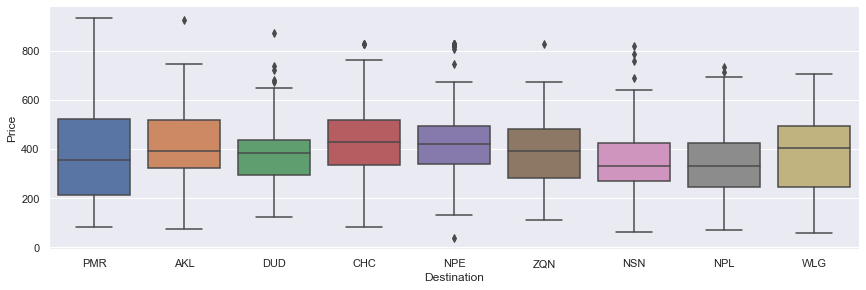

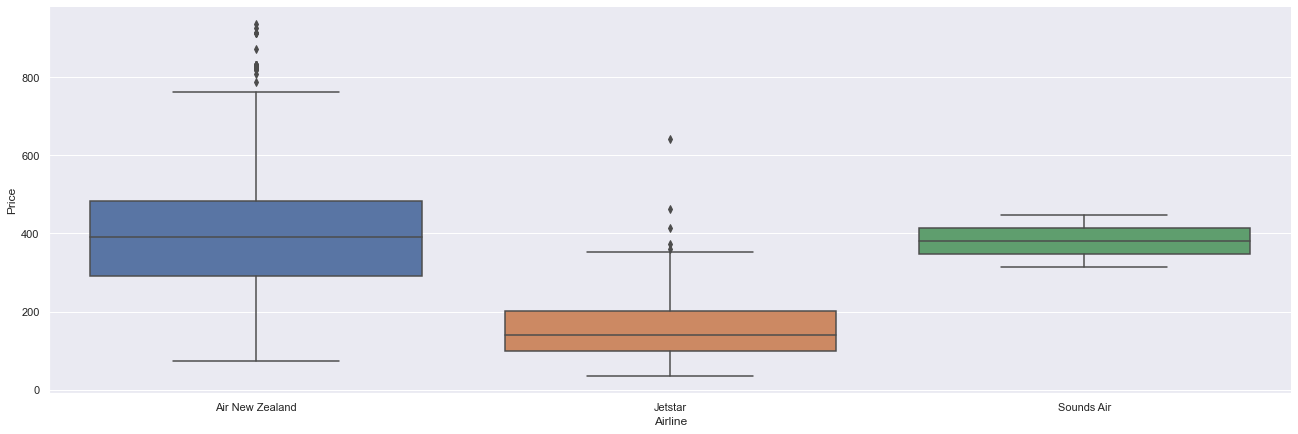

Airline
Shape of test data :  (1134, 31)


In [46]:
print("Test data Info")
print("-"*75)
print(test_data.info())

print()
print()

print("Null values :")
print("-"*75)
test_data.dropna(inplace = True)
print(test_data.isnull().sum())

#Remove transit

#test_data=test_data.drop(columns=['Transit'])


# Travel Date

test_data["Journey_day"] = pd.to_datetime(test_data.Date_of_Journey, format="%d/%m/%Y").dt.day
test_data["Journey_month"] = pd.to_datetime(test_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month
#test_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

# Departure time is when a plane leaves the gate. 
# Similar to Date_of_Journey we can extract values from Dep_Time

# Extracting Hours
test_data["Dep_hour"] = pd.to_datetime(test_data["Dep_Time"]).dt.hour

# Extracting Minutes
test_data["Dep_min"] = pd.to_datetime(test_data["Dep_Time"]).dt.minute

# Now we can drop Dep_Time as it is of no use
#test_data.drop(["Dep_Time"], axis = 1, inplace = True)

# Arrival time is when the plane pulls up to the gate.
# Similar to Date_of_Journey we can extract values from Arrival_Time

# Extracting Hours
test_data["Arrival_hour"] = pd.to_datetime(test_data["Arrival_Time"]).dt.hour

# Extracting Minutes
test_data["Arrival_min"] = pd.to_datetime(test_data["Arrival_Time"]).dt.minute

# Now we can drop Arrival_Time as it is of no use
#test_data.drop(["Arrival_Time"], axis = 1, inplace = True)


# Time taken by plane to reach destination is called Duration
# It is the differnce betwwen Departure Time and Arrival time


# Assigning and converting Duration column into list
duration = list(test_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration


# Adding duration_hours and duration_mins list to test_data dataframe

test_data["Duration_hours"] = duration_hours
test_data["Duration_mins"] = duration_mins

#test_data.drop(["Duration"], axis = 1, inplace = True)

test_data["Total_Stops"].value_counts()

# As this is case of Ordinal Categorical type we perform LabelEncoder
# Here Values are assigned with corresponding keys

test_data.replace({"(Direct)": 0, "(1 stop)": 1, "(2 stops)": 2, "(3 stops)": 3}, inplace = True)

test_data['Source'].value_counts()

print("Source")

# Departure vs Price

sns.catplot(y = "Price", x = "Source", data = test_data.sort_values("Price", ascending = False), kind="box", height = 4, aspect = 3)
plt.show()

# As Departure is Nominal Categorical data we will perform OneHotEncoding

Departure = test_data["Source"].str.get_dummies().drop('ZQN',axis=1).add_prefix('Source_')

#Departure = pd.get_dummies(Departure)

Departure.head()
test_data['Destination'].value_counts()

# As Destination is Nominal Categorical data we will perform OneHotEncoding - drop WLG

Destination = test_data["Destination"].str.get_dummies().drop('WLG',axis=1).add_prefix('Destination_')

#Destination = pd.get_dummies(Destination)

print("Destination")

# Departure vs Price

sns.catplot(y = "Price", x = "Destination", data = test_data.sort_values("Price", ascending = False), kind="box", height = 4, aspect = 3)
plt.show()

# From graph we can see that Jet Airways Business have the highest Price.
# Apart from the first Airline almost all are having similar median

# Airline vs Price
sns.catplot(y = "Price", x = "Airline", data = test_data.sort_values("Price", ascending = False), kind="box", height = 6, aspect = 3)
plt.show()

# As Airline is Nominal Categorical data we will perform OneHotEncoding - avoid Multicollinearity

Airline=test_data["Airline"].str.get_dummies().drop('Sounds Air',axis=1)
Airline = pd.get_dummies(Airline)

print("Airline")

#test_data["Transit"].value_counts()

data_test = pd.concat([test_data, Airline, Departure, Destination], axis = 1)

#test_data_v2.drop(["Airline", "Departure", "Destination"], axis = 1, inplace = True)


print("Shape of test data : ", data_test.shape)


In [47]:
data_test.head()

,Date_of_Journey,Source,Dep_Time,Destination,Arrival_Time,Duration,Total_Stops,Transit,Airline,Price,...,Source_CHC,Source_WLG,Destination_AKL,Destination_CHC,Destination_DUD,Destination_NPE,Destination_NPL,Destination_NSN,Destination_PMR,Destination_ZQN
11110,24/09/2019,ZQN,11:40 AM,NPE,7:50 PM,8h 10m,1,5h 35m in CHC,Air New Zealand,283,...,0,0,0,0,0,1,0,0,0,0
152933,10/12/2019,WLG,11:30 AM,NSN,12:10 PM,40m,0,0,Air New Zealand,183,...,0,1,0,0,0,0,0,1,0,0
43738,10/10/2019,WLG,2:00 PM,AKL,5:35 PM,3h 35m,1,1h 30m in NSN,Air New Zealand,536,...,0,1,1,0,0,0,0,0,0,0
137761,29/11/2019,AKL,8:00 PM,NPL,9:25 AM,13h 25m,1,11h 15m in WLG,Air New Zealand,402,...,0,0,0,0,0,0,1,0,0,0
47810,12/10/2019,WLG,1:35 PM,DUD,5:05 PM,3h 30m,1,1h 25m in CHC,Air New Zealand,433,...,0,1,0,0,1,0,0,0,0,0


## Feature Selection

Finding out the best feature which will contribute and have good relation with target variable.
Following are some of the feature selection methods,


1. <span style="color: purple;">**heatmap**</span>
2. <span style="color: purple;">**feature_importance_**</span>
3. <span style="color: purple;">**SelectKBest**</span>

In [48]:
data_train.shape

(4533, 30)

In [49]:
data_train.columns

Index(['Date_of_Journey', 'Source', 'Dep_Time', 'Destination', 'Arrival_Time',
       'Duration', 'Total_Stops', 'Airline', 'Price', 'Journey_day',
       'Journey_month', 'Dep_hour', 'Dep_min', 'Arrival_hour', 'Arrival_min',
       'Duration_hours', 'Duration_mins', 'Air New Zealand', 'Jetstar',
       'Source_AKL', 'Source_CHC', 'Source_WLG', 'Destination_AKL',
       'Destination_CHC', 'Destination_DUD', 'Destination_NPE',
       'Destination_NPL', 'Destination_NSN', 'Destination_PMR',
       'Destination_ZQN'],
      dtype='object')

In [50]:
X = data_train.loc[:, ['Total_Stops', 'Journey_day','Journey_month','Dep_hour', 
                       'Dep_min', 'Arrival_hour', 'Arrival_min',
                       'Duration_hours', 'Duration_mins', 'Air New Zealand', 'Jetstar',
                       'Source_AKL', 'Source_CHC', 'Source_WLG', 'Destination_AKL', 'Destination_CHC', 'Destination_DUD',
                       'Destination_NPE', 'Destination_NPL', 'Destination_NSN', 'Destination_PMR', 'Destination_ZQN']]
X.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air New Zealand,...,Source_CHC,Source_WLG,Destination_AKL,Destination_CHC,Destination_DUD,Destination_NPE,Destination_NPL,Destination_NSN,Destination_PMR,Destination_ZQN
115553,1,17,11,10,0,19,20,9,20,1,...,0,0,0,0,0,0,0,1,0,0
8953,1,23,9,14,45,18,25,3,40,1,...,0,1,0,1,0,0,0,0,0,0
144252,1,3,12,12,35,17,10,4,35,1,...,0,1,0,0,0,0,0,1,0,0
70032,1,25,10,13,20,21,15,7,55,1,...,0,0,0,1,0,0,0,0,0,0
78753,1,29,10,20,30,11,10,14,40,1,...,0,0,0,0,0,0,0,0,0,1


In [51]:
data_train.head()

,Date_of_Journey,Source,Dep_Time,Destination,Arrival_Time,Duration,Total_Stops,Airline,Price,Journey_day,...,Source_CHC,Source_WLG,Destination_AKL,Destination_CHC,Destination_DUD,Destination_NPE,Destination_NPL,Destination_NSN,Destination_PMR,Destination_ZQN
115553,17/11/2019,AKL,10:00 AM,NSN,7:20 PM,9h 20m,1,Air New Zealand,263,17,...,0,0,0,0,0,0,0,1,0,0
8953,23/09/2019,WLG,2:45 PM,CHC,6:25 PM,3h 40m,1,Air New Zealand,272,23,...,0,1,0,1,0,0,0,0,0,0
144252,3/12/2019,WLG,12:35 PM,NSN,5:10 PM,4h 35m,1,Air New Zealand,412,3,...,0,1,0,0,0,0,0,1,0,0
70032,25/10/2019,AKL,1:20 PM,CHC,9:15 PM,7h 55m,1,Air New Zealand,472,25,...,0,0,0,1,0,0,0,0,0,0
78753,29/10/2019,AKL,8:30 PM,ZQN,11:10 AM,14h 40m,1,Air New Zealand,302,29,...,0,0,0,0,0,0,0,0,0,1


In [52]:
y = data_train.iloc[:, 8]
y.head()

115553    263
8953      272
144252    412
70032     472
78753     302
Name: Price, dtype: int64

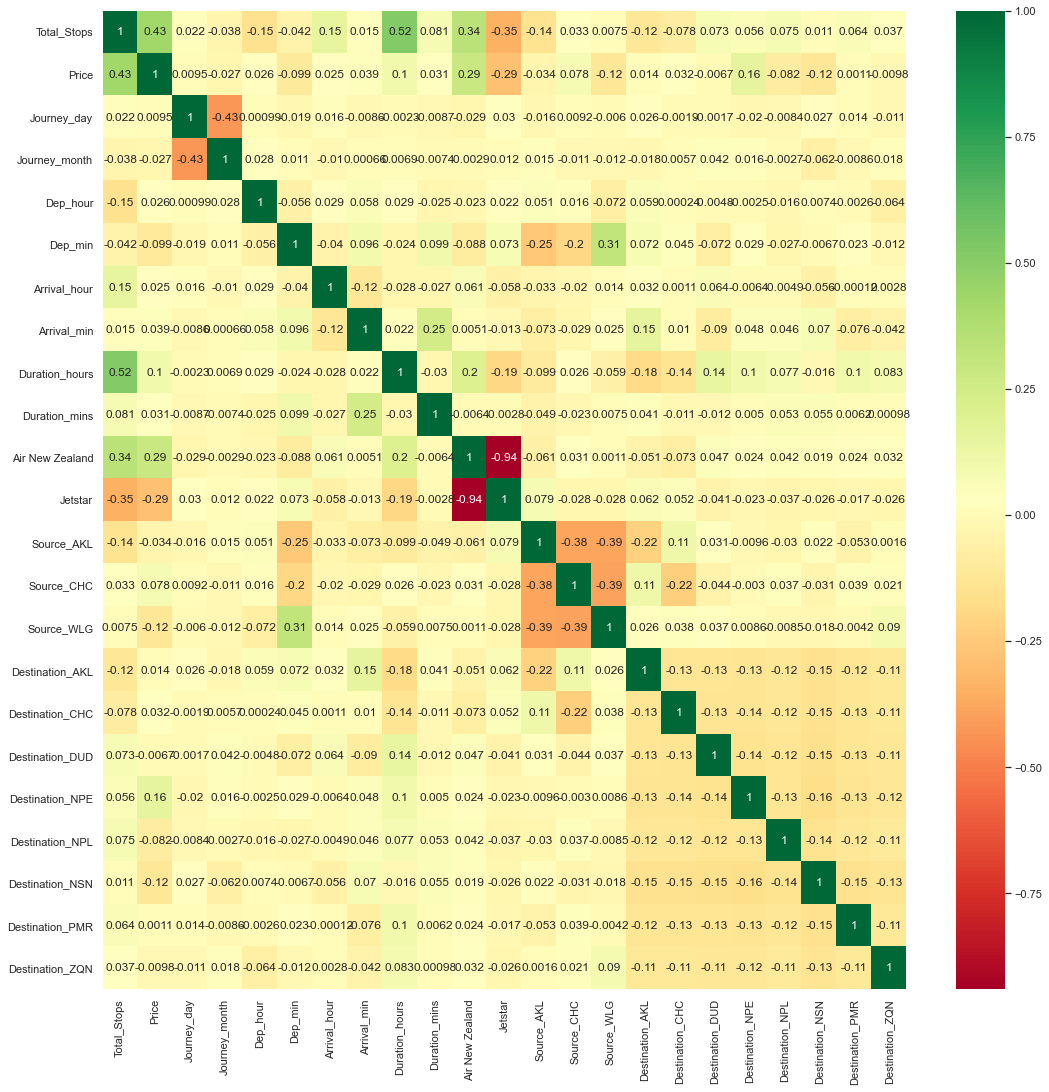

In [53]:
# Finds correlation between Independent and dependent attributes

plt.figure(figsize = (18,18))
sns.heatmap(data_train.corr(), annot = True, cmap = "RdYlGn")

plt.show()

In [54]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [55]:
print(selection.feature_importances_)

[0.1830513  0.09082201 0.05014392 0.05895734 0.05963496 0.0541794
 0.05538115 0.11079189 0.04567991 0.01690348 0.00950495 0.02091146
 0.04212505 0.02963529 0.01778669 0.00798146 0.01673878 0.02404501
 0.02795183 0.02534263 0.04401351 0.00841799]


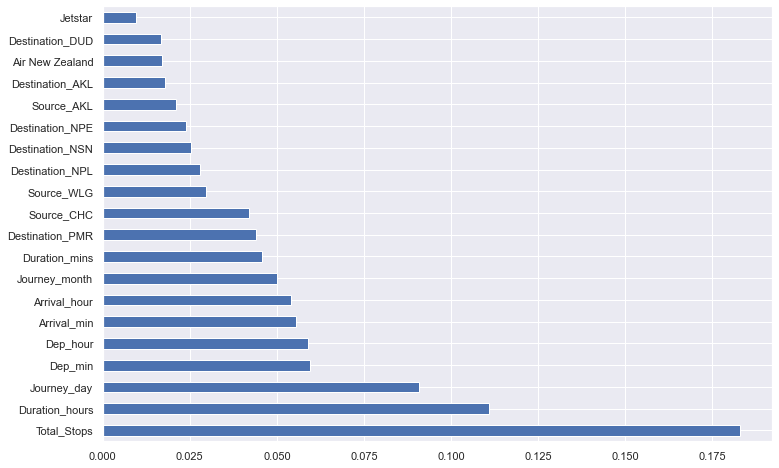

In [56]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()


## Fitting model using Random Forest

1. Split dataset into train and test set in order to prediction w.r.t X_test
2. If needed do scaling of data
    * Scaling is not done in Random forest
3. Import model
4. Fit the data
5. Predict w.r.t X_test
6. In regression check **RSME** Score
7. Plot graph

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [58]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [59]:
y_pred = reg_rf.predict(X_test)

In [60]:
reg_rf.score(X_train, y_train)

0.9358460912956018

In [61]:
reg_rf.score(X_test, y_test)

0.5580381084423036

C:\Users\alexchen\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


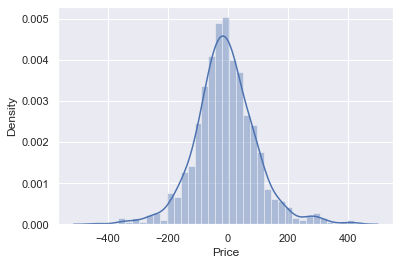

In [62]:
sns.distplot(y_test-y_pred)
plt.show()

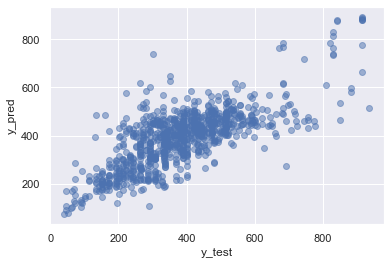

In [63]:

plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [64]:
from sklearn import metrics

In [65]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

MAE: 76.40901874310914
MSE: 10606.599239250276
RMSE: 102.98834516220889


In [66]:
# RMSE/(max(DV)-min(DV))

RMSE/(max(y)-min(y))

0.11519949123289584

## Hyperparameter Tuning


* Choose following method for hyperparameter tuning
    1. **RandomizedSearchCV** --> Fast
    2. **GridSearchCV**
* Assign hyperparameters in form of dictionery
* Fit the model
* Check best paramters and best score

In [67]:
from sklearn.model_selection import RandomizedSearchCV

In [68]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [69]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [70]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [71]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.2s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.2s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.2s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   3.1s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.2s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.2s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.2s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.2s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.2s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  2.3min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [72]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [73]:
prediction = rf_random.predict(X_test)

C:\Users\alexchen\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


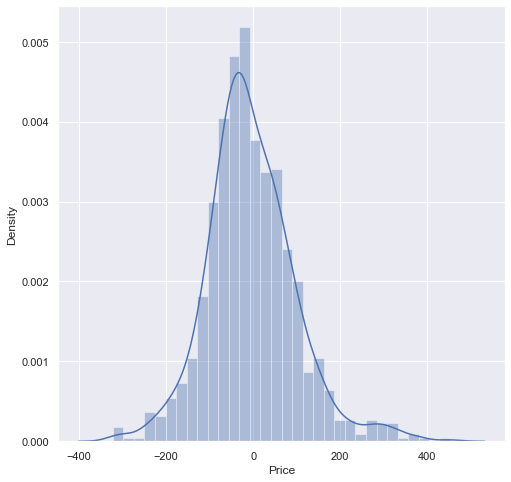

In [74]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()

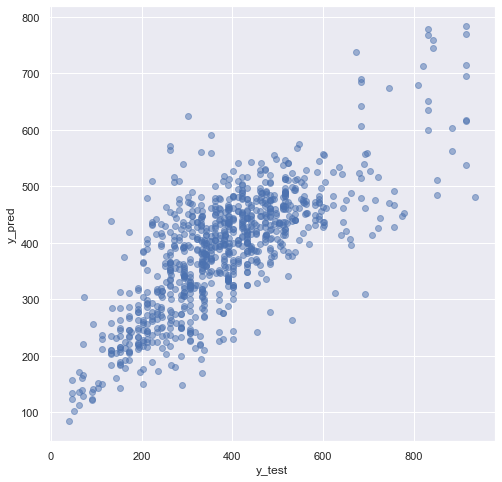

In [75]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [76]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 77.17451748127766
MSE: 10405.810137504983
RMSE: 102.0088728371458


## Save the model to reuse it again


In [77]:
import pickle
# open a file, where you ant to store the data
file = open('flight_rf.pkl','wb')

# dump information to that file
pickle.dump(reg_rf, file)

In [78]:
model = open('flight_rf.pkl', 'rb')
forest = pickle.load(model)

In [79]:
y_prediction = forest.predict(X_test)

In [80]:
#R-square (affected by data size)
metrics.r2_score(y_test, y_prediction)

0.5580381084423036